In [1]:
from keras import applications

Using TensorFlow backend.


In [45]:
!curl "https://00e9e64bac4eee7d3c2139382ac60caacc0ec0101dd450cfc7-apidata.googleusercontent.com/download/storage/v1/b/kagglecatdog/o/train%2Fcat.1000.jpg?qk=AD5uMEtsLAxVoY_qsxCYzOG4GsoM4HgCzvwAZSbzvo9vRHgByyYfCXsCSHMlfqnl4BK-ZwTW6_gluVsoI558jwKuWIe9gfMRPoA4GIGCAVEadosUugpAszdutTLZwDAkz5hSnVz9qbdLaMXEPWlwU7VXTCwCAnrXBzA9TFAwMR9DROcmojktsT_7CVPx8ZvucPbBm6R5oL7KCk-EAePXf44vYii_nuOsvTOiUa6fuWuT1UkbhgB7zD-otPkmsYwbK0tGxVn3SohyhjQp9CstHMJA3Gh9xD7uT7dePVZkyeh8reClodzD1mivo_PajgKboh2auW_2SAzfe5xU2G06MUiiYtBvZygFkrq7Ofk5myNUWGa_GIoidz3jjL3UWWVcMZ0F8CTH16CpxysEUxPHovlch1J028dnWm74VT0__hEHZg8f8og-SyURDqoc_6G8wYanAnEvxWGdz8dhWoFX8UD1GlD9ZSDgBjmw0CB3g2HxQeTUiCf5dPsd_Z9xzNqSuhiSUcEyvxAhdLdvCXWW8YeOvrHU7OjF8dFl3cJ8sG-G8VblyCtFnG4eRSEp8Erfk_-xOTpFZmggJIQ-8LSQR_HxsF513aiPKRnjYG6XMfCC6vjhIN94yke2zC93AFDbLAoFloEDHMUFAUbyG7a41MXFZp3uFAeD1MYyB3DncMNcfwHzL168o1O9zrcDY94XuoT42XEZsfL3BB-o9KDEGK0lHhDl1x7zZS-sx0PIvvKFw3IKlm41q7o9jEB7kTGMe0cG6A2qK4fWvEVORHd_kaGLO6sZPH0Ciw" > ../data/cat14.jpg

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5944  100  5944    0     0  11383      0 --:--:-- --:--:-- --:--:-- 11541


In [2]:
from skimage import io, img_as_float

In [3]:
from skimage.transform import rescale, resize, downscale_local_mean

In [4]:
image_temp = io.imread('../data/cat1.jpg')

In [5]:
image_temp.shape

(280, 300, 3)

In [6]:
??resize()

In [7]:
image_resize = resize(image_temp, (256,256), mode = "reflect")

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

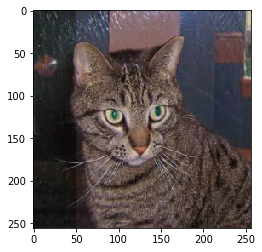

In [9]:
plt.imshow(image_resize)

In [10]:
image_resize.shape

(256, 256, 3)

In [11]:
height, width, channels = image_resize.shape

In [12]:
height

256

In [13]:
width

256

In [14]:
channels

3

In [15]:
import os
import shutil
import glob
import re

In [16]:
# Image processing pipeline
def image_processing(img_src, img_dest):
    
    img_list = glob.glob(img_src+'/*jpg')
    
    for img in img_list:
        image_temp = io.imread(img)
        image_temp = resize(image_temp, (256,256), mode = "reflect")
        image_temp = img_as_float(image_temp)
        # since the image is already normalized, no need for normalization
        height, width, channels = image_temp.shape
        print (height, ":", width, ":", channels)

        if not(os.path.exists(img_dest+'preprocessed/')):
            os.mkdir(img_dest+'preprocessed')
        else:
            print("The Path exists")
        
        print(img)
        print(re.split('/',img)[2])
        io.imsave(img_dest+'preprocessed/'+str(re.split('/',img)[2]), image_temp)
        print("The file {} has been saved.".format(str(re.split('/',img)[2])))

In [17]:
image_processing('../data/', '../data/')

256 : 256 : 3
The Path exists
../data/cat12.jpg
cat12.jpg
The file cat12.jpg has been saved.


/home/pratos/miniconda3/envs/amazon/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/pratos/miniconda3/envs/amazon/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


256 : 256 : 3
The Path exists
../data/cat14.jpg
cat14.jpg
The file cat14.jpg has been saved.
256 : 256 : 3
The Path exists
../data/cat100.jpg
cat100.jpg
The file cat100.jpg has been saved.
256 : 256 : 3
The Path exists
../data/cat1.jpg
cat1.jpg
The file cat1.jpg has been saved.


/home/pratos/miniconda3/envs/amazon/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))
/home/pratos/miniconda3/envs/amazon/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [18]:
img = '../data/cat12.jpg'

In [19]:
if re.match(r'([A-z0-9\.]+(.jpg))', str(img)):
    print("yes")

In [20]:
??io.imsave

In [21]:
from keras.models import Model, Sequential
from keras import optimizers
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D

We have the image according to our specifications. We'll be using Transfer Learning to get our model

__Source:__ [Transfer Learning using Keras - Prakash Vanapalli](https://medium.com/towards-data-science/transfer-learning-using-keras-d804b2e04ef8)

In [22]:
import h5py

In [23]:
img_width = 256
img_height = 256
model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
__________

In [25]:
model.layers

In [26]:
for layer in model.layers[:10]:
    layer.trainable = False

In [27]:
#Adding custom Layers 
x = model.output
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

In [28]:
# creating the final model 
model_final = Model(input = model.input, output = predictions)

/home/pratos/miniconda3/envs/amazon/lib/python3.5/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [29]:
# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [32]:
def batch_processing(train_src, validation_src, img_width, img_height, non_train_layers, batch_size, epochs):
    model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))
    
    for layer in model.layers[:non_train_layers]:
        layer.trainable = False
        
    #Adding custom Layers 
    x = model.output
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(1024, activation="relu")(x)
    predictions = Dense(16, activation="softmax")(x)
    
    # creating the final model 
    model_final = Model(input = model.input, output = predictions)
    
    # compile the model 
    model_final.compile(loss = "categorical_crossentropy", optimizer = \
                        optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

    # this is the augmentation configuration we will use for training
    train_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)
    
    test_datagen = ImageDataGenerator(
            rescale=1./255,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True)
    
    # this is a generator that will read pictures found in
    # subfolers of 'data/train', and indefinitely generate
    # batches of augmented image data
    train_generator = train_datagen.flow_from_directory(
            #'data/train',  # this is the target directory
            train_src,
            target_size=(256, 256),  # all images will be resized to 256x256
            batch_size=batch_size,
            class_mode='categorical')  

    # this is a similar generator, for validation data
    validation_generator = test_datagen.flow_from_directory(
            validation_src,
            target_size=(256, 256),
            batch_size=batch_size,
            class_mode='categorical')
    
    model.fit_generator(
        train_generator,
        steps_per_epoch=2000 // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
    
    model.save_weights('first_try.h5')  # always save your weights after training or during training

    